# Decision Trees - Visualization

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import pydotplus

from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

Refer: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Parameters for a decision tree:
<ul>
    <li>splitter</li>
    <li>max_depth</li>
    <li>criterion</li>
    <li>max_features</li>
    <li>max_leaf_nodes</li>
    <li>min_impurity_decrease</li>
    <li>min_impurity_split</li>
    <li>min_samples_leaf</li>
    <li>min_samples_split</li>
    <li>min_weight_fraction_leaf</li>
    <li>presort</li>
    <li>random_state</li>
    <li>class_weight</li>
</ul>

# The Iris flower dataset

<ul>
    <li>Consists of 50 samples from each of the three flower species of Iris (Iris setosa, Iris virginica and Iris versicolor). </li>
    <li>Four features present for each sample: the length and the width of the sepals and petals, in centimetres. </li>
</ul>

In [2]:
#Loading the Iris dataset from sklearn
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [3]:
#IRIS Dataset
print(df.sample(10))
#print(df.dtypes)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
18                 5.7               3.8                1.7               0.3
90                 5.5               2.6                4.4               1.2
49                 5.0               3.3                1.4               0.2
26                 5.0               3.4                1.6               0.4
119                6.0               2.2                5.0               1.5
104                6.5               3.0                5.8               2.2
75                 6.6               3.0                4.4               1.4
15                 5.7               4.4                1.5               0.4
2                  4.7               3.2                1.3               0.2
9                  4.9               3.1                1.5               0.1


In [4]:
import re
def remove_gini_impurity(graph_val):
    return re.sub(r'gini = (.*)<br/>s', "s", graph_val)

# Visualization of a Decision Tree

## First step (Depth=1)

In [5]:
#Initial distinction of one entire category
dtree=DecisionTreeClassifier(max_depth=1)
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph_val = remove_gini_impurity(dot_data.getvalue())
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(graph_val)

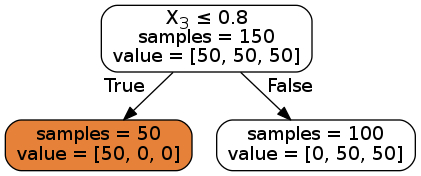

In [7]:
Image(graph.create_png())

### Observations
1. The condition X3 &le; 0.8 <b>completely</b> distinguishes one class of flowers from the other.

## Second step (Depth=2)

In [8]:
dtree=DecisionTreeClassifier(max_depth=2)

In [9]:
dtree.fit(df,y)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph_val = remove_gini_impurity(dot_data.getvalue())
graph = pydotplus.graph_from_dot_data(graph_val) 

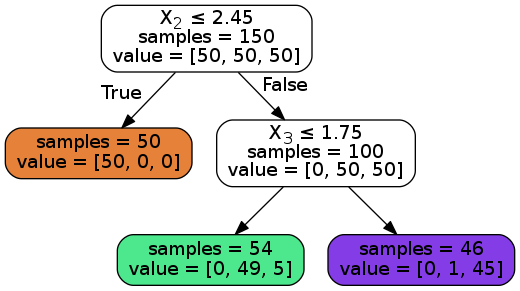

In [10]:
Image(graph.create_png())

### Observations
1. With the remaining samples, the condition X3 &le; 1.75 provides the best split between the two categories. 
2. There are however some outliers in each category of this classification.

## The completely classified Decision Tree

In [11]:
dtree=DecisionTreeClassifier()

In [12]:
dtree.fit(df,y)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph_val = remove_gini_impurity(dot_data.getvalue())
graph = pydotplus.graph_from_dot_data(graph_val)  

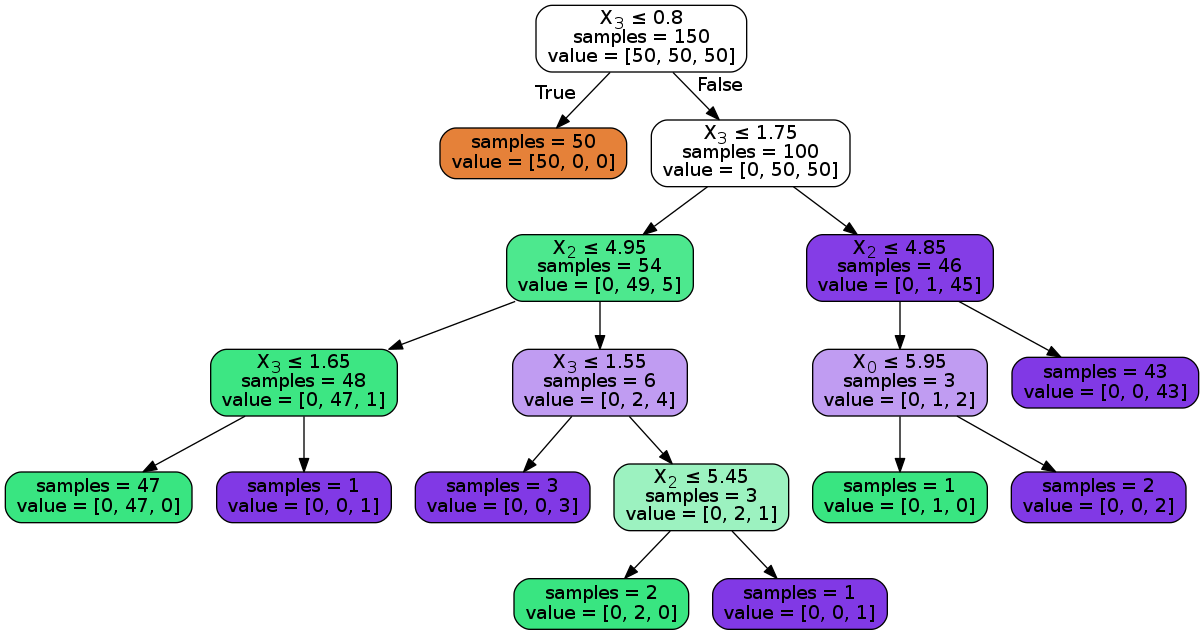

In [13]:
Image(graph.create_png(),height=1500,width=900)

### The problem with the completely classified sample: Over-fitting

In [14]:
#Highlighting the over-fit portion

new_graph_val = """
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<X<SUB>3</SUB> &le; 1.55<br/>samples = 6<br/>value = [0, 2, 4]>, fillcolor="#8139e57f"] ;
1 [label=<samples = 3<br/>value = [0, 0, 3]>, fillcolor="#8139e5ff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>2</SUB> &le; 5.45<br/>samples = 3<br/>value = [0, 2, 1]>, fillcolor="#39e5817f"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<samples = 2<br/>value = [0, 2, 0]>, fillcolor="#39e581ff"] ;
2 -> 3 ;
4 [label=<samples = 1<br/>value = [0, 0, 1]>, fillcolor="#8139e5ff"] ;
2 -> 4 ;
}
""" 
graph = pydotplus.graph_from_dot_data(new_graph_val)

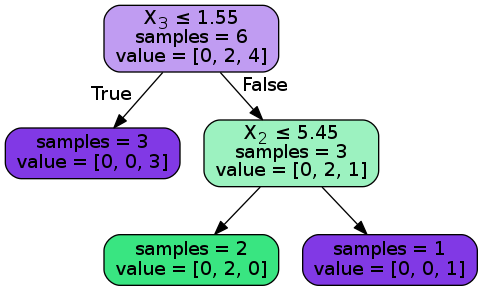

In [15]:
Image(graph.create_png())

### Ways to solve this?

<li>Use the 'min_samples_split' parameter to set the minimum number of samples required to make a split. 

In [16]:
dtree=DecisionTreeClassifier(min_samples_split=10)

In [17]:
dtree.fit(df,y)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph_val = remove_gini_impurity(dot_data.getvalue())
graph = pydotplus.graph_from_dot_data(graph_val) 

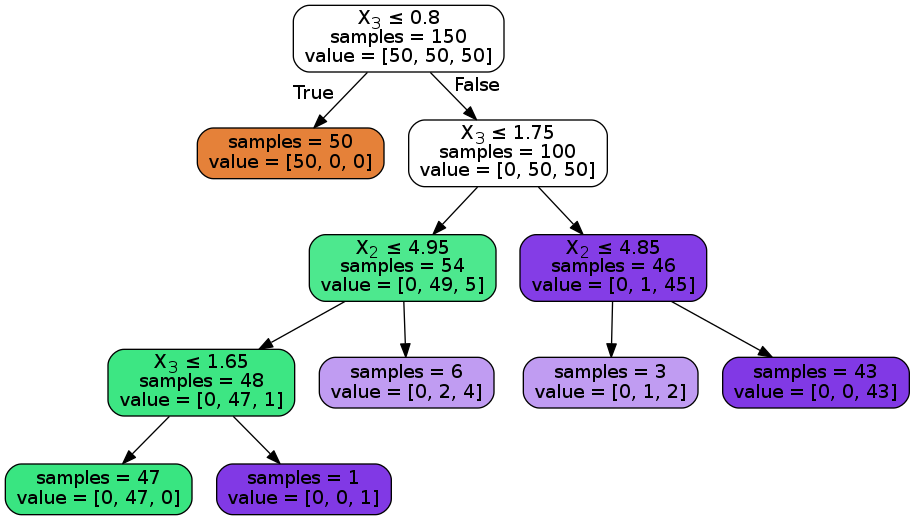

In [18]:
Image(graph.create_png(),height=1500,width=900)

**You are encouraged to explore the DecisionTreeCalssifier by altering parameters passed to it.**